<a href="https://colab.research.google.com/github/Intelligent07/Codveda_Intership/blob/main/Level_3_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Level 3, Task 1: Predictive Modeling (Classification) ---

Model Evaluation:

--- Logistic Regression ---
Accuracy: 0.8546
Precision: 0.4737
Recall: 0.1895
F1-Score: 0.2707

--- Decision Tree ---
Accuracy: 0.9130
Precision: 0.6832
Recall: 0.7263
F1-Score: 0.7041

--- Random Forest ---
Accuracy: 0.9535
Precision: 0.9571
Recall: 0.7053
F1-Score: 0.8121

--- Hyperparameter Tuning for Random Forest ---
Best F1-Score after tuning: 0.8047


--- Level 3, Task 2: Building Dashboards ---
This task requires a graphical tool like Power BI or Tableau. Here is a step-by-step guide:
1. **Import and Clean the Dataset:**
   - Open Power BI Desktop or Tableau. From the 'Get Data' or 'Connect to Data' menu, import your chosen dataset.
   - Use the Power Query Editor in Power BI or the data source page in Tableau to handle any data cleaning, such as removing duplicates, changing data types, or renaming columns.
2. **Create Interactive Visualizations:**
   - Drag and drop fields onto the canvas to cre

/tmp/ipython-input-2854707876.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, order=['Positive', 'Negative', 'Neutral'], palette='viridis')


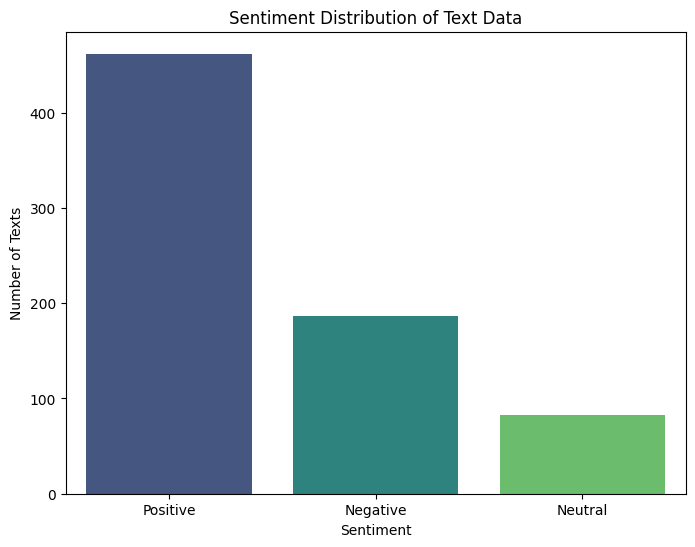

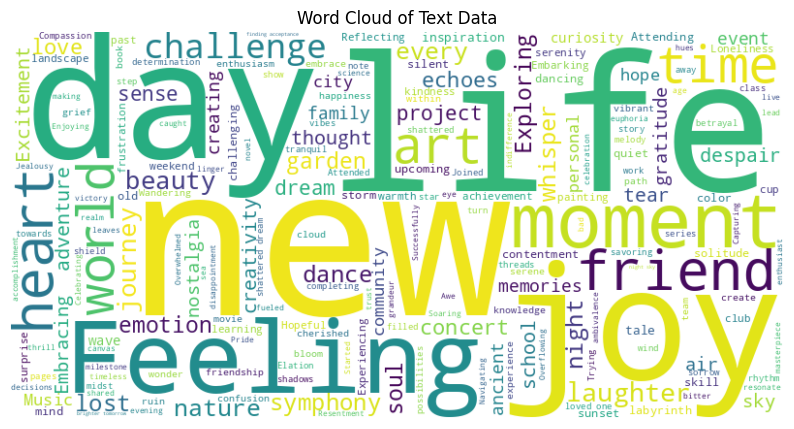

In [6]:
# level 3 all tasks

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Ensure necessary NLTK data is downloaded
# Ensure necessary NLTK data is downloaded
print("Downloading NLTK 'vader_lexicon' for sentiment analysis...")
nltk.download('vader_lexicon', quiet=True)


# --- Level 3, Task 1: Predictive Modeling (Classification) ---

def level3_task1_predictive_modeling():
    """
    Task 1: Predictive Modeling (Classification)
    Objective: Build and evaluate a classification model to predict customer churn.
    This function uses 'churn-bigml-80.csv' for training and 'churn-bigml-20.csv' for testing.
    """
    print("--- Level 3, Task 1: Predictive Modeling (Classification) ---")

    try:
        # Load the training and testing datasets
        train_df = pd.read_csv('/content/churn-bigml-80.csv') # Corrected filename
        test_df = pd.read_csv('/content/churn-bigml-20.csv')
    except FileNotFoundError:
        print("Error: Churn datasets not found. Please upload 'churn-bigml-80.csv' and 'churn-bigml-20.csv'.")
        return

    # Preprocessing
    # Handle categorical variables ('International plan', 'Voice mail plan', 'Churn')
    categorical_cols = ['International plan', 'Voice mail plan', 'Churn']
    for col in categorical_cols:
        le = LabelEncoder()
        train_df[col] = le.fit_transform(train_df[col])
        test_df[col] = le.transform(test_df[col])

    # Drop irrelevant columns for modeling
    train_df = train_df.drop(['State', 'Area code'], axis=1)
    test_df = test_df.drop(['State', 'Area code'], axis=1)

    # Define features (X) and target (y)
    X_train = train_df.drop('Churn', axis=1)
    y_train = train_df['Churn']
    X_test = test_df.drop('Churn', axis=1)
    y_test = test_df['Churn']

    # Scale numerical features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and test multiple classification models
    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42)
    }

    print("\nModel Evaluation:")
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"\n--- {name} ---")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")

    # Hyperparameter tuning for Random Forest using GridSearchCV
    print("\n--- Hyperparameter Tuning for Random Forest ---")
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    y_pred_best = best_model.predict(X_test_scaled)

    best_f1 = f1_score(y_test, y_pred_best)
    print(f"Best F1-Score after tuning: {best_f1:.4f}")


# --- Level 3, Task 3: Natural Language Processing (NLP) - Sentiment Analysis ---

def level3_task3_nlp_sentiment_analysis():
    """
    Task 3: Natural Language Processing (NLP) - Sentiment Analysis
    Objective: Perform sentiment analysis on textual data.
    This function uses the 'Sentiment dataset.csv'.
    """
    print("\n\n--- Level 3, Task 3: Natural Language Processing (NLP) ---")

    try:
        # Load the Sentiment dataset.
        df = pd.read_csv('/content/3) Sentiment dataset.csv')
    except FileNotFoundError:
        print("Error: '3) Sentiment dataset.csv' not found. Please upload the dataset.")
        return

    # Use the VADER sentiment analyzer from NLTK.
    sia = SentimentIntensityAnalyzer()

    # Analyze sentiment for each text entry.
    df['compound_score'] = df['Text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
    df['sentiment'] = df['compound_score'].apply(
        lambda score: 'Positive' if score > 0.05 else ('Negative' if score < -0.05 else 'Neutral')
    )

    # 1. Visualize the sentiment distribution.
    plt.figure(figsize=(8, 6))
    sns.countplot(x='sentiment', data=df, order=['Positive', 'Negative', 'Neutral'], palette='viridis')
    plt.title('Sentiment Distribution of Text Data')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Texts')
    plt.show()

    # 2. Visualize word frequencies using a word cloud.
    all_text = ' '.join(df['Text'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Text Data')
    plt.show()

if __name__ == "__main__":
    level3_task1_predictive_modeling()
    level3_task2_dashboard_explanation()
    level3_task3_nlp_sentiment_analysis()